In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read data from CSV
df = pd.read_csv("../data/data_for_analysis.csv")

### Number of Repositories Created in Each Year


In [10]:
# Extract year from dates
df["Repository created"] = pd.to_datetime(df["Repository created"])
df["Year"] = df["Repository created"].dt.year

# Group by Year and Count
repositories_per_year = df.groupby("Year").size()

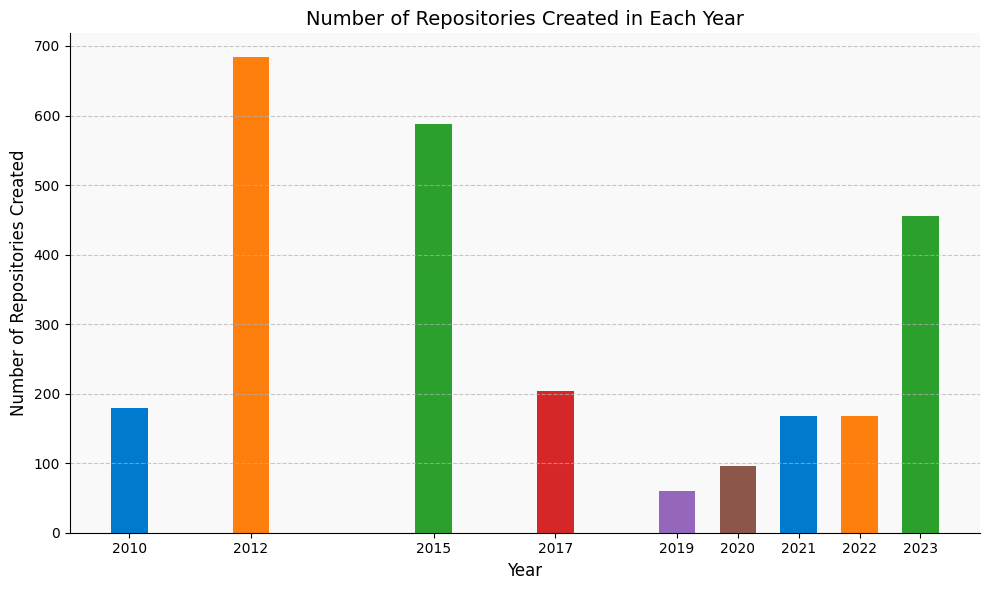

In [15]:
# Step 5: Visualize the data with custom style
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Custom color scheme for bars
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.6
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_per_year.index, repositories_per_year.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Repositories Created", fontsize=12)
plt.title("Number of Repositories Created in Each Year", fontsize=14)

# Custom font for tick labels
plt.xticks(repositories_per_year.index, fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap
plt.show()

<Figure size 1200x800 with 0 Axes>

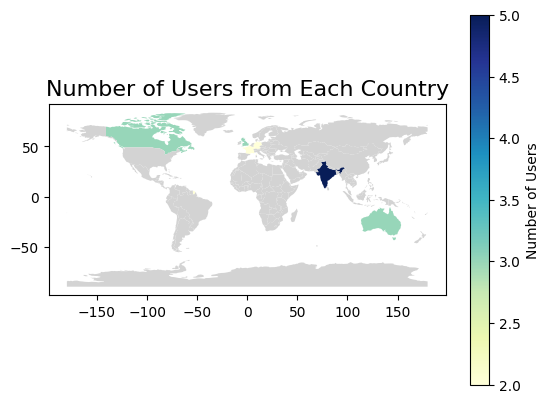

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

# Step 1: Read data from CSV
file_path = "../data/user_data_for_analysis.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Step 2: Group by country and calculate the count of users from each country
country_counts = df['Country'].value_counts()

# Step 3: Create a DataFrame with country names and their corresponding counts
df_countries = pd.DataFrame({'Country': country_counts.index, 'User Count': country_counts.values})

# Step 4: Load world shapefile data using geopandas
world = gpd.read_file('../data/ne_110m_admin_0_countries.shp')  # Replace with the correct path to the shapefile

# Step 5: Merge the world shapefile data with the user count data
merged_data = world.merge(df_countries, left_on='ADMIN', right_on='Country', how='left')

# Step 6: Plot the choropleth map
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
merged_data.plot(column='User Count', cmap='YlGnBu', legend=True, legend_kwds={'label': 'Number of Users'}, missing_kwds={'color': 'lightgrey'})
plt.title('Number of Users from Each Country', fontsize=16)

plt.show()


In [34]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
